<a href="https://colab.research.google.com/github/VictorFu0717/AI/blob/main/fashion_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:

trans = [
	"T-shirt",
	"Trouser",
	"Pullover",
	"Dress",
	"Coat",
	"Sandal",
	"Shirt",
	"Sneaker",
	"Bag",
	"boot"
]

boot


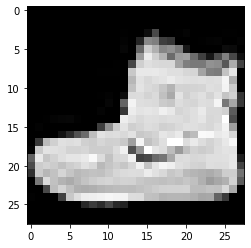

In [ ]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse顏色反過來: 顏色後面+ _r 
# 0是黑色,255是白色,預設是黃紫色
import matplotlib.pyplot as plt
print(trans[y_train[0]])
plt.imshow(x_train[0], cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


bias偏移:事先設定一個值,利用斜率調整到loss,讓大家事先扣掉這個值,從0開始激活

Dropout(0.5~0.25):為了防止過度依賴某個神經元來判斷,因此丟掉某些神經元,用來應付意外狀況,不是用來提高準確率

In [ ]:
#隨機的一個模型
#中間層必選relu,最後一層選softmax
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
# 一個神經元(兩個機率): BinaryCrossEntropy
# 多個神經元: pilog(1/qi): CategoricalCrossEntropy
from tensorflow.keras.losses import CategoricalCrossentropy
import os
if os.path.exists("mlp.h5"):
    print("模型存在, 直接讀取")
    model = load_model("mlp.h5")
else:
    layers = [
        # 784 * 256 + 256(bias)
        Dense(256, activation="relu", input_dim=784),
        Dropout(0.25),
        # 128 * 10 + 10(bias)
        Dense(10, activation="softmax")
    ]
    model = Sequential(layers)
    model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")
model.summary()
# 無腦選adam

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


mse的坡度變動小,要訓練很久,因此不適合用在機率,適合用在回歸
cross entropy交叉商(log loss)坡度變動大

全局最佳vs局部最佳：optimizer（優化器）
動量優化：Wf= 現在坡度＋比例 x 前面的速度
動態步長：調整步長,剛開使步長大,一段時間後小
adam：動量＋動態

In [ ]:
# 做one-hot encoding
# num_classes 最後判定為0~9, 設定 10 欄
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# 讓x變一維
# 懶得填60000筆,可以填 -1,會自動幫你算有幾筆
x_train_shape = x_train.reshape(-1, 784)/255.0
x_test_shape = x_test.reshape(-1, 784)/255.0
# scale 調整輸入的值(-1~1)or(0~1),來配合隨機的係數w1,w2....

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
   EarlyStopping(patience=5, restore_best_weights=True),
   ModelCheckpoint("mlp.h5", save_best_only=True)
   # ModelCheckpoint儲存模型
]
#patience:這裡設定連續5次val_loss沒有變好就停下來
model.fit(x_train_shape,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)
#batch看多少筆調整一次,依圖片大小來調：圖片大調大
#epochs總共訓練的次數
#verbose:0(不輸出訓練 log) 1(只輸出進度條) 2(每一個 epoch 輸出訓練信息)

Epoch 1/50
270/270 - 2s - loss: 0.6047 - accuracy: 0.7895 - val_loss: 0.4264 - val_accuracy: 0.8467
Epoch 2/50
270/270 - 1s - loss: 0.4217 - accuracy: 0.8512 - val_loss: 0.3899 - val_accuracy: 0.8607
Epoch 3/50
270/270 - 1s - loss: 0.3804 - accuracy: 0.8636 - val_loss: 0.3587 - val_accuracy: 0.8710
Epoch 4/50
270/270 - 1s - loss: 0.3548 - accuracy: 0.8736 - val_loss: 0.3469 - val_accuracy: 0.8785
Epoch 5/50
270/270 - 1s - loss: 0.3326 - accuracy: 0.8794 - val_loss: 0.3279 - val_accuracy: 0.8812
Epoch 6/50
270/270 - 1s - loss: 0.3218 - accuracy: 0.8838 - val_loss: 0.3250 - val_accuracy: 0.8828
Epoch 7/50
270/270 - 1s - loss: 0.3110 - accuracy: 0.8867 - val_loss: 0.3274 - val_accuracy: 0.8822
Epoch 8/50
270/270 - 1s - loss: 0.2949 - accuracy: 0.8931 - val_loss: 0.3270 - val_accuracy: 0.8793
Epoch 9/50
270/270 - 1s - loss: 0.2866 - accuracy: 0.8937 - val_loss: 0.3074 - val_accuracy: 0.8850
Epoch 10/50
270/270 - 1s - loss: 0.2825 - accuracy: 0.8970 - val_loss: 0.3351 - val_accuracy: 0.8797

In [ ]:
# model.save("mlp.h5")
model.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8932


[0.3181346356868744, 0.8931999802589417]

In [ ]:
from sklearn.metrics import confusion_matrix
# sklearn: predict_proba/predict
# tensorflow: predict/predict_classes
pre = model.predict_classes(x_test_shape)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       columns=[trans[i] + "(預測)" for i in range(10)],
       index=[trans[i] + "(正確)" for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),boot(預測)
T-shirt(正確),850,2,17,16,5,1,105,0,4,0
Trouser(正確),3,973,1,17,3,0,3,0,0,0
Pullover(正確),15,1,830,11,98,0,45,0,0,0
Dress(正確),12,9,15,902,28,0,29,0,5,0
Coat(正確),0,0,85,31,835,0,46,0,3,0
Sandal(正確),0,0,0,0,0,955,0,27,2,16
Shirt(正確),110,0,93,24,73,0,695,0,5,0
Sneaker(正確),0,0,0,0,0,11,0,960,0,29
Bag(正確),6,0,3,2,4,2,7,5,971,0
boot(正確),0,0,0,0,0,4,1,34,0,961


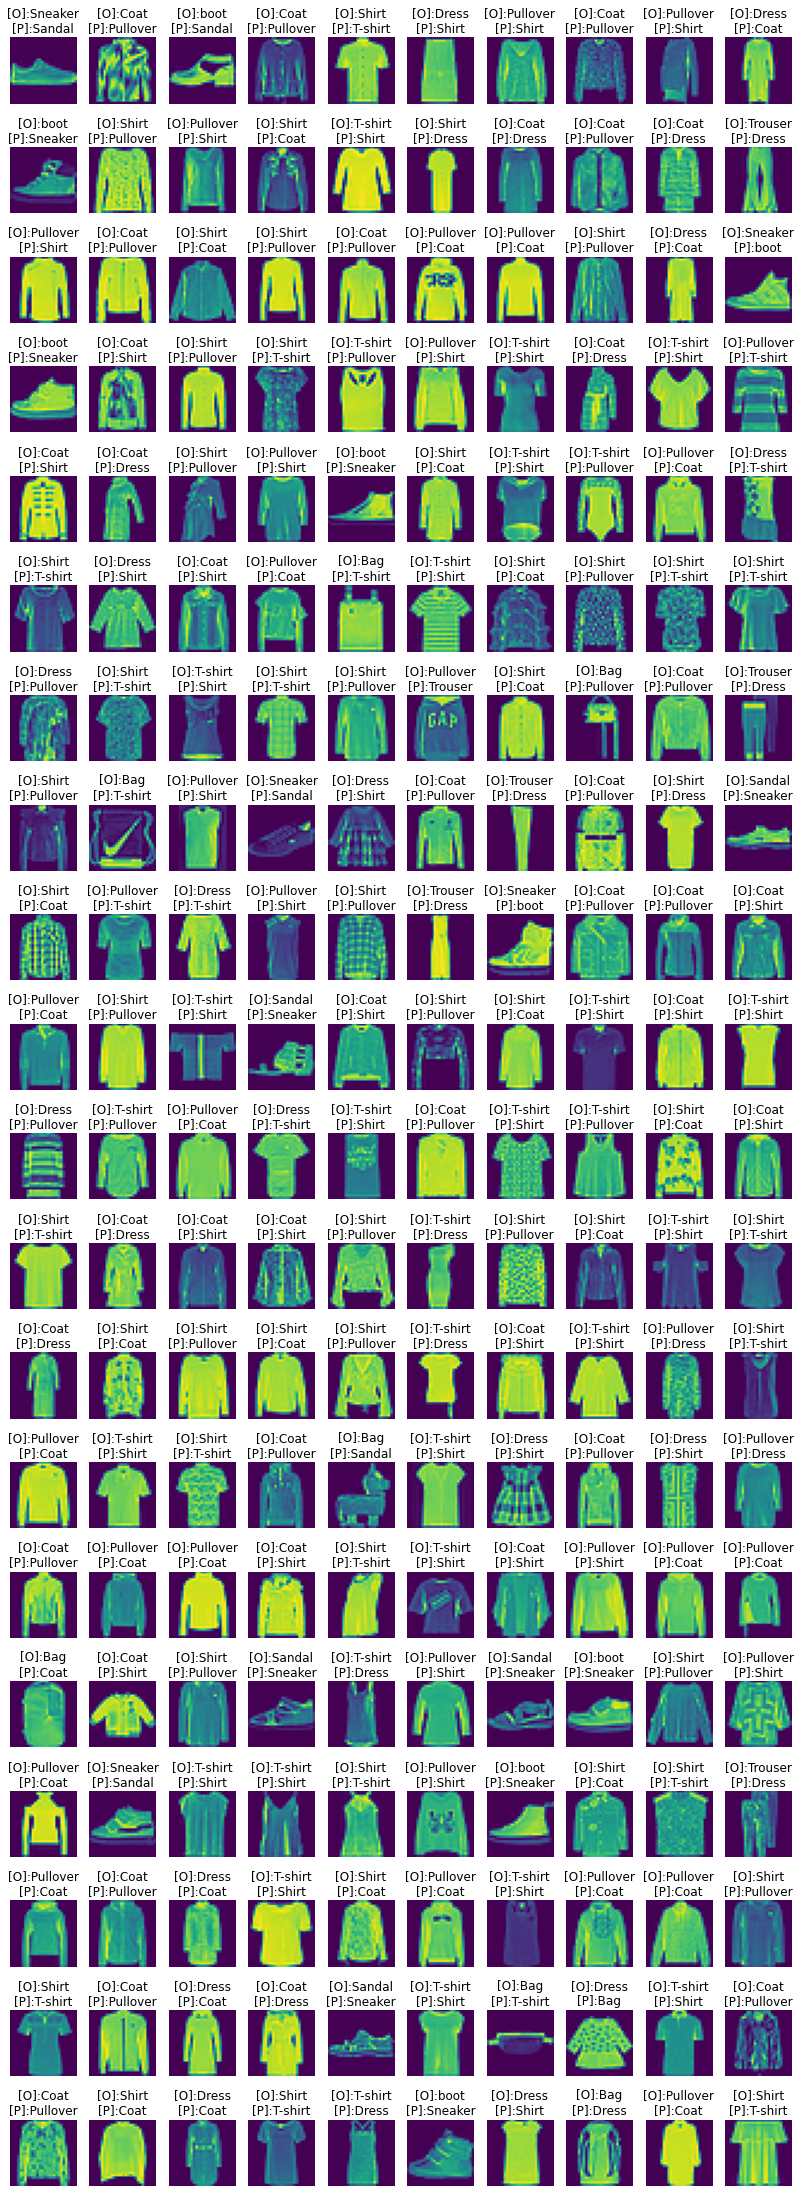

In [ ]:
#印出錯誤的200筆資料
import numpy as np
idx = np.nonzero(pre != y_test)[0][:200]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    plt.imshow(false_img[i])
    t = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(t)
    plt.axis("off")

In [ ]:
# Pillow
import requests
from PIL import Image
# RGB, RGBA, L(gray)
url = input("url:")
headers = {
  "user-agent":"user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"  
}
response = requests.get(url, headers=headers, stream=True, verify=False)
img = Image.open(response.raw).resize((28, 28)).convert("L")
img_np = 255 - np.array(img)
img_np_r = img_np.reshape(1, 784) / 255.0
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(trans[i], "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", trans[ans])
plt.imshow(img_np, "gray")